# **Notebook for Medicare Data Analysis**

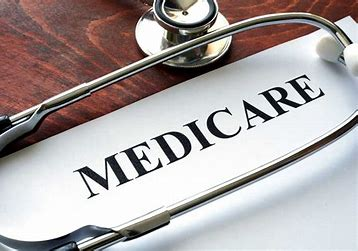

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('2010_BSA_Outpatient_PUF.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

#### BENE_SEX_IDENT_CD
This field indicates the sex of the beneficiery.

#### BENE_AGE_CAT_CD
This categorical variable is based on the beneficiary's age at end of the reference year (2010).  

#### OP_CLM_ICD9_DIAG_CD
The ICD‐9‐CM code indicates the primary diagnosis code associated with the claim. It gives the knowledge of the diagnosis given to the patient.

#### OP_HCPCD_CD 
This Variable consists of thr HCPCS Codes that are required for medical providers to submit healthcare claims to Medicare and other health insurances in a consistent and orderly manner.

#### OP_HCPCS_UNIT_CNT
This variable provides the count of total number of units/services of a particular procedure given.

#### OP_HCPCS_PMT_AMT 
This field contains the payment made by Medicare for the procedure.

#### PROC_CNT 
This field contains the number of outpatient procedures associated with each profile.

In [ ]:
df.shape

### Data Cleaning

In [ ]:
df.isnull().sum()

There are Null values in the ICD9 code variable so we have to remove it.

In [ ]:
data = df.dropna()

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

Here the null values are removed.

In [ ]:
data.rename(columns = {'BENE_SEX_IDENT_CD' : 'Benificiary_Sex', 
                       'BENE_AGE_CAT_CD' : 'Benificiary_Age', 
                       'OP_CLM_ICD9_DIAG_CD' : 'ICD9_Codes',
                       'OP_HCPCD_CD' : 'HCPCS_Codes',
                       'OP_HCPCS_UNIT_CNT' : 'HCPCS_unit_counts',
                       'OP_HCPCS_PMT_AMT' : 'HCPCS_Payment'}, inplace = True)

In [ ]:
data.info()

Here we have made the data readability easy for the end user.

In [ ]:
plt.figure(figsize=(20, 15))
sp_plot = sns.barplot(x = data['Benificiary_Sex'], y = data['PROC_CNT'])
sp_plot.set_title('Total Number of Procedures on Each Sex', size = 15)

#### 1:- Male
#### 2:- Female
From this Plot we can understand that the Female benificiary are more in numbers than the male benificiary.


In [ ]:
male_beneficiaries = pd.DataFrame(data.groupby(['Benificiary_Age'])['Benificiary_Sex'].sum().sort_values(ascending = False)).reset_index()
female_beneficiaries = pd.DataFrame(data.groupby(['Benificiary_Age'])['Benificiary_Sex'].sum().sort_values(ascending = False)).reset_index()
male_female_beneficiaries = pd.merge(male_beneficiaries,female_beneficiaries)

In [ ]:
male_female_beneficiaries

### Here Beneficiary_Age Represents as


#### 1:- Under 65
#### 2:- 65-69
#### 3:- 70-74
#### 4:- 75-79
#### 5:- 80-84
#### 6:- 85 and Above

In [ ]:
plt.barh(male_female_beneficiaries.Benificiary_Age,male_female_beneficiaries.Benificiary_Sex, color ='r')
plt.xlabel('Total Benificiary', fontweight ='bold', fontsize = 15) 
plt.ylabel('Age Groups',fontweight ='bold', fontsize = 15)
plt.figure(figsize=(30, 20))
plt.show()

Here we can see that the Benificiary from both the female and the male groups are from the Age group Under 65 which summarizes that
most of the benificiary are from age less than 65.

And the least Are from the Age group of 80-84

### Now lets get the insights of the Diagnosis provided by the doctors to the beneficiary with the help of various graphs.

In [ ]:
data

In [ ]:
data['ICD9_Codes'].sample(10)  #The second column represents the ICD9 Codes for various entries.

#### Here we can see that the ICD9 Codes are three digit codes for Various diagnosis of the patient.

#### The values of the various diagnosis are given below:-
###### 001 ‐ 139 :- Infectious and parasitic diseases 
###### 140 ‐ 239:-  Neoplasms 
###### 240 ‐ 279:-  Endocrine, nutritional and metabolic diseases,and immunity disorders 
###### 280 ‐ 289:-  Diseases of the blood and blood‐forming organs 
###### 290 ‐ 319:-  Mental disorders 
###### 320 ‐ 389:-  Diseases of the nervous system and sense organs 
###### 390 ‐ 459:-  Diseases of the circulatory system 
###### 460 ‐ 519:-  Diseases of the respiratory system 
###### 520 ‐ 579:-  Diseases of the digestive system 
###### 580 ‐ 629:-  Diseases of the genitourinary system
###### 630 ‐ 679:-  Complications of pregnancy, childbirth, and the puerperium 
###### 680 ‐ 709:-  Diseases of the skin and subcutaneous tissue 
###### 710 ‐ 739:-  Diseases of the musculoskeletal system and connective tissue
###### 740 ‐ 759:-  Congenital anomalies 
###### 760 ‐ 779:-  Certain conditions originating in the perinatal period 
###### 780 ‐ 799:-  Symptoms, signs, and ill‐defined condition
###### 800 ‐ 999:-  Injury and poisoning
###### V codes Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services 

In [ ]:
plt.figure(figsize=(30, 20))
plt.yticks(fontsize=10, rotation=45)
sns.histplot(data=data, y=data['ICD9_Codes'], x=None, hue=None, weights=None, stat='count', bins='auto', multiple='layer', element='bars', fill=True, shrink=1, color=None, legend=True)

As we can see that the groups of the icd9 codes are not clearly visible so we need to make the groups of the diagnosis so that the histogram is clearly visible.

In [ ]:
data['ICD9_Codes'] = pd.to_numeric(data['ICD9_Codes'], errors='coerce') 
data = data.dropna(subset=['ICD9_Codes']) 
data['ICD9_Codes'] = data['ICD9_Codes'].astype(int)

In [ ]:
data.sample(10)

In [ ]:
bins = [1,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,1000]
labels = ['001-139', '140-239', '240-279', '280-289', '290-319', '320-389', '390-459','460-519','520-579','580-629','630-679','680-709','710-739','740-759','760-779','780-799','800-999']
data['group'] = pd.cut(data['ICD9_Codes'], bins=bins, labels=labels, right=False)

As we can see here the groups are made perfectly for further analysis and insights of the icd9 codes, so lets make the histogram.

In [ ]:
plt.figure(figsize=(30, 20))
plt.yticks(fontsize=20, rotation=45)
sns.histplot(data=data, y=data['group'], x=None, hue=None, weights=None, stat='count', bins='auto', multiple='layer', element='bars', fill=True, shrink=1, color=None, legend=True)

##### From the above graph we can conclude that the group 780-799 have the most number of counts which conclude the below things:-
1. The Beneficiary mostly have the ill-condition and Symptomns to claim their insurance rather than other condition.
2. The diagnosis provided by the doctors are for the ill-condition and Symptoms
3. The Second most diagnosis provided by the doctors is for the Circulatotry disorder.

In [ ]:
plt.figure(figsize=(20, 15))
sp_plot = sns.barplot(x = data['group'], y = data['HCPCS_Payment'])
sp_plot.set_title('Most Payments By Each Diagnosis', size = 15)

From the above graph we can conclude that the group 390-459 that is the group of circulatory disesase has the most number of the payments made by the medicare to the hospitals which indeed suggests that the claim for the circulatory disease is more than any other.

In [ ]:
data

In [ ]:
plt.figure(figsize=(20, 15))
plt.pie(data['Benificiary_Age'], labels=data['Benificiary_Sex'], autopct='%1.1f%%')
plt.title('My Pie Chart')
plt.show()

In [ ]:
plt.figure(figsize=(30, 20))
plt.yticks(fontsize=20, rotation=45)
plt.ylim(0, 5000)
sns.histplot(data=data, y=data['HCPCS_Payment'], x=None, hue=None, weights=None, stat='count', bins=30, multiple='layer', element='bars', fill=True, shrink=1, color=None, legend=True)

Here we can see that most of the payments are from the 0-1000 category and more specifically the $10 payments

In [ ]:
data['HCPCS_Payment'].value_counts()

In [ ]:
plt.figure(figsize=(12, 6)) 
sns.histplot(x=data['HCPCS_Codes'],y=None, data=data) 
plt.xlabel('Disease') 
plt.ylabel('Count') 
plt.title('Disease Counts for Age Group X') 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.show()